Гипотеза - взять среднее по всем отправленным сабмишшонам
- нашлепали 23 варианта с точностью выше 0,85, в среднем 0,9
- если бы они были независимыми, то ансабль дал бы точность 99,999%

In [1]:
import math

n = 23
k = 23 // 2
p = 0.9

(1 - math.comb(n, k) * p**(n-k) * (1 - p)**k) * 100

99.99961813323718

In [2]:
import os
import numpy as np
import pandas as pd

class_ids = {'cleaned': 0, 'dirty': 1}
class_names = {v: k for k, v in class_ids.items()}

In [3]:
ENSEMBLE_DIR_1 = "ensemble1"

submission_df = None
for i, submission in enumerate(os.listdir(ENSEMBLE_DIR_1)):
    if submission_df is None:
        submission_df = pd.read_csv(os.path.join(ENSEMBLE_DIR_1, submission), index_col=0)
    else:
        submission_df[f'{i}'] = pd.read_csv(os.path.join(ENSEMBLE_DIR_1, submission))['label']

NUM = i + 1

submission_df = submission_df.rename(columns={"label": "0"})
submission_df = submission_df.applymap(lambda x: class_ids[x])


In [4]:
submission_df["count"] = submission_df.sum(axis=1)

submission_df['label'] = (submission_df["count"] > NUM // 2).astype(int)
submission_df['label'] = submission_df['label'].apply(lambda x: class_names[x])

submission_df['id'] = submission_df.index
submission_df['id'] = submission_df['id'].apply(lambda x: "0"*(4 - len(str(x))) + str(x))

submission_df.reset_index(drop=True, inplace=True)
submission_df.set_index('id', inplace=True)

submission_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,count,label
id,,,,,,,,,,,,,,,,,,,,,
0000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,23,dirty
0001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,23,dirty
0002,0,0,0,0,1,1,1,0,1,0,...,1,0,1,1,1,0,0,0,9,cleaned
0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,23,dirty
0004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,23,dirty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0739,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,23,dirty
0740,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,23,dirty
0741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cleaned


In [5]:
submission_df['label'].to_csv(f"{ENSEMBLE_DIR_1}.csv")

In [6]:
ENSEMBLE_DIR_2 = "ensemble2"

submission_df = None
for i, submission in enumerate(os.listdir(ENSEMBLE_DIR_2)):
    if submission_df is None:
        submission_df = pd.read_csv(os.path.join(ENSEMBLE_DIR_2, submission), index_col=0)
    else:
        submission_df[f'{i}'] = pd.read_csv(os.path.join(ENSEMBLE_DIR_2, submission))['label']

NUM = i + 1

submission_df = submission_df.rename(columns={"label": "0"})
submission_df = submission_df.applymap(lambda x: class_ids[x])

In [7]:
w = list(map(float, "0.95026 0.95833 0.95026 0.96505 0.96236 0.97043 0.93817 0.96505 0.96505 0.96774 0.97177 0.97849".split()))

submission_df['weighted'] = ((submission_df[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']] * w).sum(axis=1) > NUM // 2).astype(int)
submission_df['label'] = submission_df['weighted'].apply(lambda x: class_names[x])

submission_df['id'] = submission_df.index
submission_df['id'] = submission_df['id'].apply(lambda x: "0"*(4 - len(str(x))) + str(x))

submission_df.reset_index(drop=True, inplace=True)
submission_df.set_index('id', inplace=True)

submission_df

,0,1,2,3,4,5,6,7,8,9,10,11,weighted,label
id,,,,,,,,,,,,,,
0000,1,1,1,1,1,1,1,1,1,1,1,1,1,dirty
0001,1,1,1,1,1,1,1,1,1,1,1,1,1,dirty
0002,0,0,0,1,1,1,1,1,1,1,1,1,1,dirty
0003,1,1,1,1,1,1,1,1,1,1,1,1,1,dirty
0004,1,1,1,1,1,1,1,1,1,1,1,1,1,dirty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0739,1,1,1,1,1,1,1,1,1,1,1,1,1,dirty
0740,1,1,1,1,1,1,1,1,1,1,1,1,1,dirty
0741,0,0,0,0,0,0,0,0,0,0,0,0,0,cleaned


In [8]:
submission_df['label'].to_csv(f"{ENSEMBLE_DIR_2}.csv")

Независимости экспертов ожидаемо нет, поэтому теоретическая точность не достигается. 

Имеем только небольшое улучшение (добавился 1 дополнительный верно размеченный пример)

**0.97177** (21 ошибочная метка)

78/1678 (в ТОР 5%)

In [9]:
submission_df[submission_df['10'] != submission_df['11']]

,0,1,2,3,4,5,6,7,8,9,10,11,weighted,label
id,,,,,,,,,,,,,,
0023,1,1,0,1,1,1,1,1,1,1,1,0,1,dirty
0075,0,0,0,1,0,0,1,0,1,1,1,0,0,cleaned
0152,0,0,0,0,1,1,0,0,0,1,1,0,0,cleaned
0179,0,1,0,1,1,1,1,1,0,1,1,0,1,dirty
0225,0,0,0,0,0,0,0,0,0,0,0,1,0,cleaned
0264,1,1,0,1,1,0,1,1,0,1,1,0,1,dirty
0533,1,1,0,1,0,1,0,1,1,1,1,0,1,dirty
0571,0,0,0,0,1,0,1,0,0,1,1,0,0,cleaned
0722,0,0,0,1,1,0,1,0,0,1,1,0,0,cleaned


skip
- 58
- 155
- 191
- 203
- 264 ?
- 296
- 338
- 378
- 391
- 477
- 488
- 490
- 516
- 546
- 567
- 576
- 586
- 598
- 637
- 647
- 652
- 729

check
- 75 
- 120 -> d
- 179
- 270
- 382 -> d
- 506
- 511

In [10]:
fin = pd.read_csv('markup-learn-submission98+.csv', index_col=0)
fin['label'] = fin['label'].apply(lambda x: class_ids[x])

In [11]:
744 * 0.65322, 744 - 0.98118*744, fin['label'].sum()

(485.99568, 14.002079999999978, 478)

Осталось 14 ошибок, в т.ч. 8 ошибочно грязных, 6 ошибочно чистых

In [12]:
fin['97'] = pd.read_csv('markup-learn-submission97.csv', index_col=0)
fin['96'] = pd.read_csv('markup-learn-submission96.csv', index_col=0)

In [13]:
fin['97'] = fin['97'].apply(lambda x: class_ids[x])
fin['96'] = fin['96'].apply(lambda x: class_ids[x])

In [14]:
fin[(fin['96'] == fin['label']) & (fin['96'] == fin['label']) & (fin['96'] == fin['97'])]
fin[(fin['96'] != fin['label']) | (fin['96'] != fin['label']) | (fin['96'] != fin['97'])]

,label,97,96
id,,,
23,0,1,1
75,0,1,1
120,1,0,0
139,0,0,1
152,0,1,1
179,0,1,1
225,1,0,0
264,0,1,1
382,1,0,0


152 чистая ОК
454 чистая ОК

# Попробуем еще доучить

In [15]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2  # pip install opencv-python
import torch 
import torchvision
from torchvision import transforms, models

from sklearn.model_selection import train_test_split

import re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
NAME = "fine-tune-learn"

INPUT_DIR = "./input" # "../input"
WORKING_DIR = "./kaggle/working/" # "/kaggle/working/"
DATA_ROOT = os.path.join(WORKING_DIR, 'plates')
TRAIN_DIR = os.path.join(DATA_ROOT, 'train')
TEST_DIR = 'test'

модель

In [17]:
NUM_CLASSES = 1

MODELS = {"resnet18": models.resnet18,
          "resnet50": models.resnet50,
          "resnet101": models.resnet101,
          "resnet152": models.resnet152,
          "googlenet": models.googlenet,
}

def get_model(model, freeze=True):
    model = model(pretrained=True)

    if freeze:
        for param in model.parameters():            # Disable grad for all conv layers
            param.requires_grad = False

    model.fc = torch.nn.Sequential(
        torch.nn.Linear(model.fc.in_features, 256),
        torch.nn.BatchNorm1d(256),
        torch.nn.Sigmoid(),
        torch.nn.Linear(256, NUM_CLASSES),
        torch.nn.Sigmoid(),
    )

    return model

def unfreeze(model, layer=None):
    flag = False
    for name, child in model.named_children(): # упорядоченные от входа к выходу
        if (name == layer) or flag:
            flag = True
            for param in child.parameters(): 
                param.requires_grad = True 
        else: 
            for param in child.parameters(): 
                param.requires_grad = False

MODEL = "resnet50"

model = get_model(MODELS[MODEL], freeze=(MODEL != "googlenet"))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("models/plates-resnet50-97acc.pt", map_location=device))

<All keys matched successfully>

In [18]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

данные

In [19]:
class ImageFolderLOL(torchvision.datasets.ImageFolder):
    """Атрибут target в оригинале есть, хранит таргеты при инициализации и потом
    не используется, поэтому можно его уот так уот... А мож он так и задуман...
    """

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.targets = torch.tensor(self.targets)
        self.scores = torch.zeros_like(self.targets).float()
        self.image_id_regex = re.compile(r"([0-9]{4}).jpg$")

    def __getitem__(self, index):
        original = super().__getitem__(index)
        path = self.imgs[index][0]
        image_id = re.search(self.image_id_regex, path)[1]
        return {"tensor": original[0],
                "image_id": image_id,
                "index": index,
                "target": self.targets[index],
                "score": self.scores[index]}

# константы для ImageNet
MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])

CLASS_NAMES = ['cleaned', 'dirty']

train_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=90, fill=255),
    transforms.CenterCrop(180),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(hue=(0.1, 0.2)), # brightness, contrast, saturation and hue
    transforms.RandomInvert(0.1),
    transforms.ToTensor(),
    transforms.Normalize(MEAN, STD)
])

test_transforms = transforms.Compose([
    transforms.CenterCrop(180),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(MEAN, STD)
])

test_dataset = ImageFolderLOL(TEST_DIR, train_transforms)

test_dataset.targets = torch.tensor(fin["label"].to_list())

таргеты из лучшего приближения

In [20]:
test_idx = np.arange(len(test_dataset))
test_sampler = torch.utils.data.SubsetRandomSampler(test_idx)     # random w/o replacement

TRAIN_SIZE = 512 - 96
VAL_SIZE = 96
BATCH_SIZE = 16

def get_dataloader(dataset, sampler=None, batch_size=BATCH_SIZE):
    return torch.utils.data.DataLoader(dataset, 
                                       sampler=sampler,
                                       batch_size=batch_size,
                                       num_workers=4)

test_dataloader = get_dataloader(test_dataset, sampler=test_sampler)

In [21]:
def get_predictions(model, dataloader):
    model.eval()

    predictions = []
    image_ids = []

    for batch in dataloader:
        inputs = batch["tensor"].to(device)
        with torch.no_grad():
            preds = model(inputs)
        dataloader.dataset.scores[batch["index"]] = preds.flatten().data.cpu()

        predictions.append(preds.flatten().data.cpu())
        image_ids.extend(batch["image_id"])

    predictions = torch.cat(predictions)

    return predictions, image_ids

In [22]:
from sklearn.model_selection import train_test_split


def next_train_val(test_predictions, test_image_ids):
    N = min(TRAIN_SIZE + VAL_SIZE, len(test_predictions))
    
    dirty_ratio = torch.round(test_predictions).mean().item() # НЕ используем априорное знание о соотношении классов
    dirty_num = int(round(N * dirty_ratio))
    clean_num = N - dirty_num

    ordered_idx = torch.tensor([int(idx) for idx in test_image_ids])[torch.argsort(test_predictions)]
    clean_idx = ordered_idx[:clean_num]                     # most clean
    dirty_idx = ordered_idx[-dirty_num:]                    # most dirty

    next_train_idx = np.hstack((clean_idx, dirty_idx))
    np.random.shuffle(next_train_idx)

    next_train_idx, next_val_idx = next_train_idx[:TRAIN_SIZE], next_train_idx[-VAL_SIZE:]

    next_train_sampler = torch.utils.data.SubsetRandomSampler(next_train_idx)
    next_train_dataloader = get_dataloader(test_dataset, sampler=next_train_sampler, batch_size=BATCH_SIZE)
    
    next_val_sampler = torch.utils.data.SubsetRandomSampler(next_val_idx)
    next_val_dataloader = get_dataloader(test_dataset, sampler=next_val_sampler, batch_size=BATCH_SIZE)
        
    return next_train_dataloader, next_val_dataloader

Выбираем обучающую выборку

In [23]:
predictions, image_ids = get_predictions(model, test_dataloader)
train_dataloader, val_dataloader = next_train_val(predictions, image_ids)

In [24]:
from cycler import cycler

monochrome = (cycler('color', ['k']) * cycler('marker', ['', '.']) *
              cycler('linestyle', ['-', '--', ':', '-.']))

def acc_loss_graph(accuracies, losses, net_list):
    plt.rc('axes', prop_cycle=monochrome)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    for experiment_id in net_list:
        ax1.plot(accuracies[experiment_id]['train'], label=f"{experiment_id} train")
        ax1.plot(accuracies[experiment_id]['val'], label=f"{experiment_id} val")
    ax1.legend()
    ax1.set_title(f'Accuracy')

    for experiment_id in net_list:
        ax2.plot(losses[experiment_id]['train'], label=f"{experiment_id} train")
        ax2.plot(losses[experiment_id]['val'], label=f"{experiment_id} val")
    ax2.legend()
    ax2.set_title(f'Loss')
    
    fig.tight_layout()

In [25]:
from tqdm import tqdm
losses, accuracies = {}, {}

PHASES = ['train', 'val']

def train_model(model, loss, optimizer, scheduler, train_dataloader, val_dataloader, num_epochs, name=NAME, verbose=False, unfreezable=True):
    losses[name] = losses.get(name, {'train':[], 'val':[]})
    accuracies[name] = accuracies.get(name, {'train':[], 'val':[]})
    model.to(device)
    
    # best_loss = np.inf
    # epoch = 0
    # while best_loss > 0.1:
    #     epoch += 1
    for epoch in tqdm(range(num_epochs)):
        if verbose: print(f"Epoch {epoch}/{num_epochs - 1}:", flush=True)
        
        if unfreezable:
            if epoch == 0: 
                unfreeze(model, layer='layer4')
            elif epoch == 15:
                unfreeze(model, layer='layer3')
            elif epoch == 50:
                unfreeze(model, layer='layer2')
            elif epoch == 100000:
                unfreeze(model, layer='layer1')

        # Each epoch has a training and validation phase
        for phase in PHASES:
            if phase == 'train':
                dataloader = train_dataloader
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for batch in dataloader:
                inputs = batch["tensor"].to(device)
                labels = batch["target"].to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model.forward(inputs)
                    loss_value = loss(preds.squeeze(-1), labels.float())    # убрать измерение класса
                    preds_class = torch.round(preds).int()                  # class 0 if (x <= 0.5) else class 1

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class.flatten() == labels.data).float().mean()
        
            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            # best_loss = epoch_loss
            
            if phase == 'train':
                scheduler.step()
            
            losses[name][phase].append(epoch_loss)
            accuracies[name][phase].append(epoch_acc.item())
            
            if verbose: print(f"[{phase}]\t Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}", flush=True)

    return model, losses, accuracies

3.584859224085419e-05

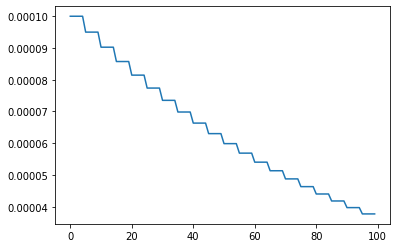

In [26]:
NUM_EPOCHES = 100
LR = 1.0e-4
STEP_SIZE = 5
GAMMA = 0.95

loss = torch.nn.BCELoss() if NUM_CLASSES == 1 else torch.nn.CrossEntropyLoss()

optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

# Decay LR by a factor of 'gamma' every 'step_size' epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

lrs = []
opt = torch.optim.AdamW(model.parameters(), lr=LR)
sch = torch.optim.lr_scheduler.StepLR(opt, step_size=STEP_SIZE, gamma=GAMMA)

for i in range(NUM_EPOCHES):
    opt.step()
    lrs.append(opt.param_groups[0]["lr"])
    sch.step()

plt.plot(range(NUM_EPOCHES), lrs)
opt.param_groups[0]["lr"]

100%|██████████| 100/100 [06:45<00:00,  4.06s/it]


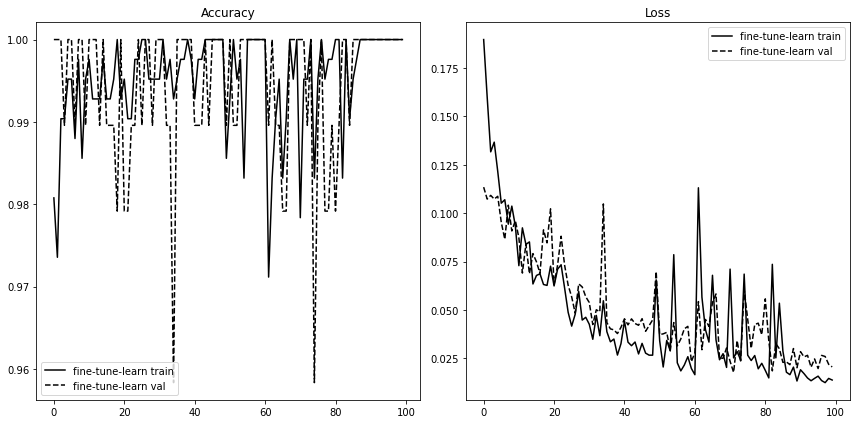

In [27]:
model, losses, accuracies = train_model(model, loss, optimizer, scheduler, train_dataloader, val_dataloader, num_epochs=NUM_EPOCHES, unfreezable=(MODEL != "googlenet"))

acc_loss_graph(accuracies, losses, [NAME])

In [28]:
test_predictions, test_image_ids = get_predictions(model, test_dataloader)

In [29]:
from scipy.optimize import minimize_scalar

DIRTY_RATIO = 0.65322

def dirty_ratio_residual(threshold):
    dirty_ratio = (test_predictions.numpy() > threshold).sum() / test_predictions.shape[0]
    return (dirty_ratio - DIRTY_RATIO)**2

CLASS_THRESHOLD = minimize_scalar(dirty_ratio_residual, bounds=(0, 1), method='bounded').x
CLASS_THRESHOLD

0.5428061736147081

In [30]:
fin_fin = pd.DataFrame.from_dict({'id': test_image_ids, 
                                        'score': test_predictions})

fin_fin['label'] = fin_fin['score'].map(lambda pred: 'dirty' if pred > CLASS_THRESHOLD else 'cleaned')
fin_fin.set_index('id', inplace=True)
fin_fin.sort_index(inplace=True)

dirty_ratio = (fin_fin['label'] == "dirty").sum() / fin_fin['label'].count()
dirty_ratio

0.6532258064516129

# Сравним
- ерунда 96,2%

In [31]:
fin_fin["label"].to_csv(f'wtf.csv')

In [32]:
fin['962'] = pd.read_csv('wtf.csv', index_col=0)

In [33]:
fin['962'] = fin['962'].apply(lambda x: class_ids[x])

In [34]:
fin[(fin['96'] == fin['label']) & (fin['96'] == fin['label']) & (fin['96'] == fin['97']) & (fin['96'] == fin['962'])]
fin[(fin['96'] != fin['label']) | (fin['96'] != fin['label']) | (fin['96'] != fin['97']) | (fin['96'] != fin['962'])]

,label,97,96,962
id,,,,
2,1,1,1,0
23,0,1,1,1
75,0,1,1,0
120,1,0,0,1
139,0,0,1,1
152,0,1,1,1
155,0,0,0,1
179,0,1,1,1
225,1,0,0,1


# Будем считать, что оставшиеся 14 ошибок - это ошибки верификатора, а не классификатора

- и на этом успокоимся 